In [1]:
import sys
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
sys.path.insert(0, 'C:\\Users\\Bailey\\Desktop\\Github files\\GeoACT_Classroom\src')
from infection import generate_infectivity_curves, plot_infectivity_curves, return_aerosol_transmission_rate
from classroom import make_velocity_distance, make_new_heat, load_parameters

C:\Users\Bailey\Desktop\Github files\GeoACT_Classroom #############################################
['.git', '.ipynb_checkpoints', 'av.py', 'av_run.py', 'config', 'make_heat testing.ipynb', 'README.md', 'results', 'src', 'temp_notebook.ipynb', '__pycache__'] ['aerosol.json', 'default.json', 'large_classroom.json', 'neighbor_logic.json', 'small_classroom.json']


In [2]:
w1 = (24, 0)
w2 = (74, 0)
door = (20, 96)
vent = (50, 96) ############### make slider for this maybe ##########
ws = 8 # 40 centimeters diameter
vs = 4 # 20 centimeters diameter

direction_matrix, velocity_matrix = make_velocity_distance(w1, w2, door, vent, ws, vs)


room_size = "100x100"
array_size = [int(room_size.split('x')[0]), int(room_size.split('x')[1])]
nothings = np.zeros(array_size)
avg_array = nothings.copy()
class_flow_pos = load_parameters('config/small_classroom.json')

velocity = v at x, y in velocity matrix
direction = d at x, y in direction matrix

neighbor_distribution = 

indicies:
0 1 2
7   3
6 5 4
rotation: index starts at:
'up' -> idx = 0
'down -> idx = 4

In [3]:

init_ = 0

def initial_cough(init_x, init_y, initial_spread, old):
    '''
    Initially infected student distributing at each step to nearby
    
    TODO: Include code to catch students being next to walls
    
    TODO: Implement these as input variables
    Current Assumptions:
    Respiratory Activity = 2.04 quanta / ft^3
    Breathing Rate = .29 ft^3 / min
    
    
    '''
    new = old.copy()
    for i in range(len(initial_spread)):
        for j in range(len(initial_spread[0])):
            new[init_y + j - 3][init_x + i - 3] += initial_spread[i][j]
            
    return new

def normalize_(matrix):
    '''
    Make everything 0.01-1
    
    I dislike mpl vmin and vmax
    '''
    max_ = 0
    new = np.zeros(matrix.shape)
    for y in range(len(matrix)):
        for x in range(len(matrix[y])):
            if matrix[y][x] > max_:
                max_ = matrix[y][x]
    for y in range(len(matrix)):
        for x in range(len(matrix[y])):
            new[y][x] = matrix[y][x] / max_
            
    return new


def distribute(new, ach, initial, dir_matrix, vel_matrix, loc):
    '''
    0 1 2
    7 8 3
    6 5 4
    corners and edges: direction face inwards
    
    near open window: TODO
    
    
    '''
    out = np.zeros(new.shape)
    init_x, init_y = loc[initial]
            
    for y in range(len(new)):
        for x in range(len(new[0])):
            conc = new[y][x]
            
            # corners
            if ((y == 0) and (x == 0)): # bottom left
                iter_arr_x = [0, 1]
                iter_arr_y = [0, 1]
                d = 2
                v = vel_matrix[y][x]
            elif ((y==0) and (x==len(new[0]) - 1)): # bottom right
                iter_arr_x = [-1, 0]
                iter_arr_y = [0, 1]
                d = 0
                v = vel_matrix[y][x]
            elif ((y == len(new) - 1) and (x == len(new[0]) - 1)): # top right
                iter_arr_x = [-1, 0]
                iter_arr_y = [-1, 0]
                d = 6
                v = vel_matrix[y][x]
            elif ((y == len(new)-1) and (x == 0)): # top left
                iter_arr_x = [0, 1]
                iter_arr_y = [-1, 0]  
                d = 4
                v = vel_matrix[y][x]   
            # edges
            elif (y == 0): # bottom
                iter_arr_x = [-1, 0, 1]
                iter_arr_y = [0, 1]  
                d = 1
                v = vel_matrix[y][x]  
            elif (y == len(new) - 1): # top
                iter_arr_x = [-1, 0, 1]
                iter_arr_y = [-1, 0]  
                d = 5
                v = vel_matrix[y][x]   
            elif (x == 0): # left
                iter_arr_x = [0, 1]
                iter_arr_y = [-1, 0, 1]  
                d = 3
                v = vel_matrix[y][x]  
            elif (x == len(new[0]) - 1): # right
                iter_arr_x = [-1, 0]
                iter_arr_y = [-1, 0, 1]  
                d = 7
                v = vel_matrix[y][x]  
            # window
            
            
            # everywhere else
            else:
                iter_arr_x = [-1, 0, 1]
                iter_arr_y = [-1, 0, 1]
                d = dir_matrix[y][x]
                v = vel_matrix[y][x]
            min_ = 1
            airflow = ach * v / 60
            for i in iter_arr_x:
                for j in iter_arr_y:
                    idx = str(i) + ',' + str(j)
                    if d == dir_ref[idx]:
                        out[y + j][x + i] += airflow * conc * (1 - .02 * v)
                    elif (i ==0) and (j == 0):
                        out[y][x] += (1 - airflow) * conc * (1 - .02 * v)
                        if out[y][x] < 0:
                            out[y][x] = 0
                    else:
                        out[y + j][x + i] += .02 * v * conc
                    if out[y + j][x + i] < min_:
                        min_ = out[y + j][x + i]
    return out, min_
# ACH can be 2, 3, 4, 5, 6 # but not 20
ach = 4
# ACM is at best 6/60: 1/10: * vents which is by 0-5 = 5/10 at best
# this results in 

# 0 1 2 
# 7 8 3
# 6 5 4

dir_ref = {"-1,1": 0, 
           "0,1": 1,
           "1,1": 2,
           "1,0": 3,
           "1,-1": 4,
           "0,-1": 5,
           "-1,-1": 6,
           "-1,0": 7,
           "0,0": 8}
           
# This is derived from ~2.04 quanta / ft*3 * .29 ft*3 / min
initial_spread = np.array([[0, 0, 0, .03, 0, 0, 0],[0, 0, .04, .1, .03, 0, 0],[0, .03, .1, .2, .1, .04, 0],[.03, .1, .2, .3, .2, .1, .03],[0, .04, .1, .2, .1, .03, 0],[0, 0, .03, .1, .04, 0, 0],[0, 0, 0, .03, 0, 0, 0]])

# loc = {0: (50, 50)}

old = np.zeros((100, 100)) # y, x

# a, init = make_new_h(old)
# b, init = make_new_h(a)

In [4]:
# test model run here 100 minutes
loc_2 = {0:(25, 40)}
first = np.zeros((100, 100))
initial = 0
temp = initial_cough(25, 40, initial_spread, first)
vent_, min_0 = distribute(temp, ach, initial, direction_matrix, velocity_matrix, loc_2)
temp_arr_ = []
vent_arr = []
min_arr = []
normed_arr = []
for i in range(180):
    temp = initial_cough(25, 40, initial_spread, vent_)
    vent_, min_i = distribute(temp, ach, initial, direction_matrix, velocity_matrix, loc_2)
    normed = normalize_(vent_)
    temp_arr_.append(temp)
    vent_arr.append(vent_)
    min_arr.append(min_i)
    normed_arr.append(normed)
print('finished')

finished


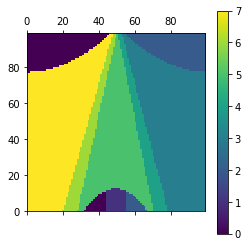

In [5]:
plt.matshow(direction_matrix)
plt.xlim(0,99)
plt.ylim(0,99)
plt.colorbar()

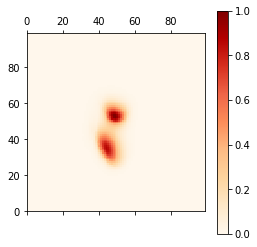

In [6]:
my_cmap = copy.copy(mpl.cm.get_cmap("OrRd")) # copy the default cmap
my_cmap.set_bad(color='w')
# plot_fix
# for t in range(len(temp_arr_)):
#     for y in range(len(temp_arr_[t])):
#         for x in range(len(temp_arr_[t][y])):
#             if temp_arr_[t][y][x] < min_arr[t]:
#                 temp_arr_[t][y][x] = min_arr[t]
#                 print(min_arr[t])

plt.matshow(normed_arr[179], cmap=my_cmap)
plt.xlim(0,99)
plt.ylim(0,99)
plt.colorbar()

In [7]:
%matplotlib
plt.ion()

Using matplotlib backend: TkAgg


In [8]:
# fig, axes = plt.subplots(1, 4)
# axes[0].matshow(normed_arr[0], cmap=my_cmap)
# axes[1].matshow(normed_arr[50], cmap=my_cmap)
# axes[2].matshow(normed_arr[100], cmap=my_cmap)
# axes[3].matshow(normed_arr[150], cmap=my_cmap)
# for i in range(4):
#     axes[i].tick_params(axis='both', which='both', labelcolor='g', size=0)
#     axes[i].set_xlim(0,99)
#     axes[i].set_ylim(0,99)
#     axes[i].set_axis_off()
#     this_str = str(50 * i) + " Minutes"
#     axes[i].set_title(this_str)
# fig.suptitle('Relative Viral Concentration\nStudent at (25, 40)\nACH = 4')
# plt.savefig('results/relative_2540_4.png', dpi=300)

In [9]:
# change initial to 25, 40

In [10]:
# fig, axes = plt.subplots(1, 4)
# a = 0
# b = 6
# # why is everything in between not

# # something to do with how it's plotting 0s ######################## BEIGE

# # working
# c = 69
# d = 150



# axes[0].matshow(vent_arr[a], norm=mpl.colors.LogNorm(), cmap=my_cmap)
# axes[1].matshow(vent_arr[b], norm=mpl.colors.LogNorm(), cmap=my_cmap)
# axes[2].matshow(vent_arr[c], norm=mpl.colors.LogNorm(), cmap=my_cmap)
# axes[3].matshow(vent_arr[d], norm=mpl.colors.LogNorm(), cmap=my_cmap)

# minutes = [a, b, c, d]
# for i in range(4):
#     axes[i].tick_params(axis='both', which='both', labelcolor='g', size=0)
#     axes[i].set_xlim(0,99)
#     axes[i].set_ylim(0,99)
#     axes[i].set_axis_off()
#     this_str = str(minutes[i]) + " Minutes"
#     axes[i].set_title(this_str)
# fig.suptitle('Log Normalized Viral Concentration\nStudent at (25, 40)\nACH = 4')
# plt.savefig('results/lognorm_2540_4.png', dpi=300)

In [11]:
#### change initial to 45, 50

In [12]:
# fig, axes = plt.subplots(1, 4)
# axes[0].matshow(normed_arr[0], cmap=my_cmap)
# axes[1].matshow(normed_arr[50], cmap=my_cmap)
# axes[2].matshow(normed_arr[100], cmap=my_cmap)
# axes[3].matshow(normed_arr[150], cmap=my_cmap)
# for i in range(4):
#     axes[i].tick_params(axis='both', which='both', labelcolor='g', size=0)
#     axes[i].set_xlim(0,99)
#     axes[i].set_ylim(0,99)
#     axes[i].set_axis_off()
#     this_str = str(50 * i) + " Minutes"
#     axes[i].set_title(this_str)
# fig.suptitle('Relative Viral Concentration\nStudent at (45, 50)\nACH = 4')
# plt.savefig('results/relative_4550_4.png', dpi=300)

In [13]:
# fig, axes = plt.subplots(1, 4)
# axes[0].matshow(vent_arr[0], norm=mpl.colors.LogNorm(), cmap=my_cmap)
# axes[1].matshow(vent_arr[50], norm=mpl.colors.LogNorm(), cmap=my_cmap)
# axes[2].matshow(vent_arr[100], norm=mpl.colors.LogNorm(), cmap=my_cmap)
# axes[3].matshow(vent_arr[150], norm=mpl.colors.LogNorm(), cmap=my_cmap)
# for i in range(4):
#     axes[i].tick_params(axis='both', which='both', labelcolor='g', size=0)
#     axes[i].set_xlim(0,99)
#     axes[i].set_ylim(0,99)
#     axes[i].set_axis_off()
#     this_str = str(50 * i) + " Minutes"
#     axes[i].set_title(this_str)
# fig.suptitle('Log Normalized Viral Concentration\nStudent at (45, 50)\nACH = 4')
# plt.savefig('results/lognorm_4550_4.png', dpi=300)

In [14]:

direction_matrix, velocity_matrix = make_velocity_distance(w1, w2, door, vent, ws, vs)
temp_, vent_, min_, normed_ = concentration_distribution(ach = 4, direction_matrix=direction_matrix, velocity_matrix=velocity_matrix, loc=class_flow_pos)

NameError: name 'concentration_distribution' is not defined